In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("Pharma_Industry.csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [7]:
df.shape

(500, 6)

In [9]:
df.info

<bound method DataFrame.info of      Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0           -0.128538                        0.303280         -1.881849   
1           -1.846188                        2.865142         -0.929511   
2           -1.252393                       -1.541613          0.363632   
3            1.992515                       -1.142779         -0.766657   
4            0.377100                        0.538410         -0.029263   
..                ...                             ...               ...   
495         -1.553759                        0.506938          0.817890   
496          0.551476                        1.714321          0.340589   
497         -1.072743                       -0.221137          0.239247   
498          1.661259                        0.245759         -0.457096   
499         -1.143726                        0.715320          0.108560   

     Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug 

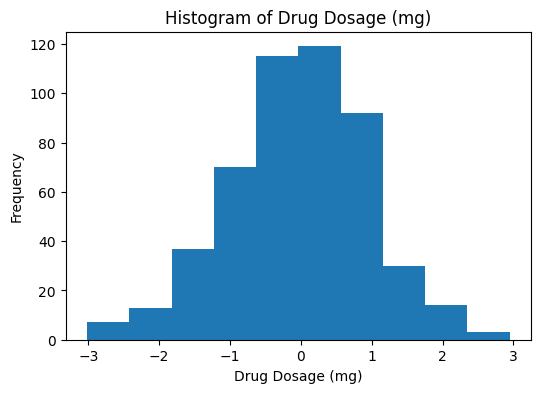

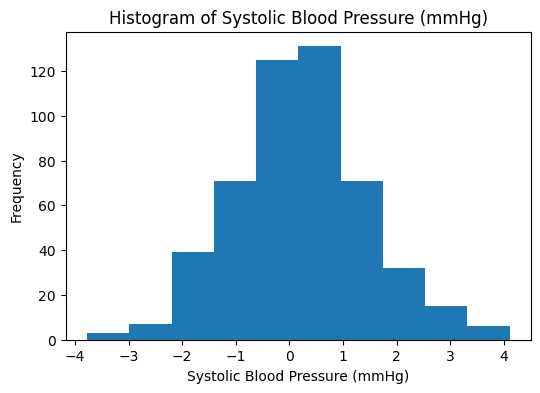

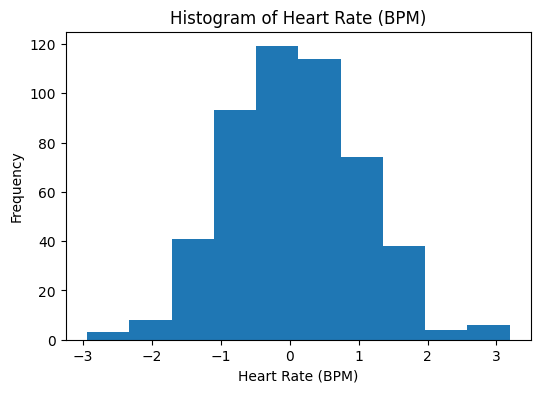

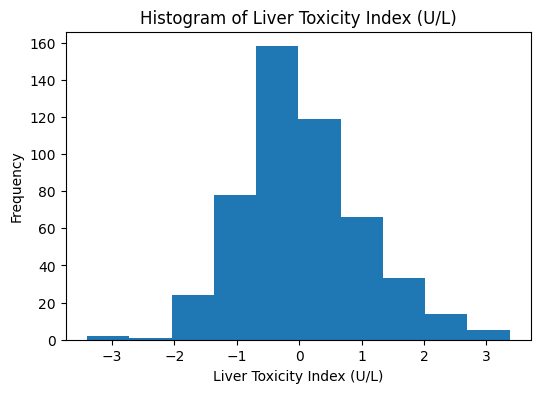

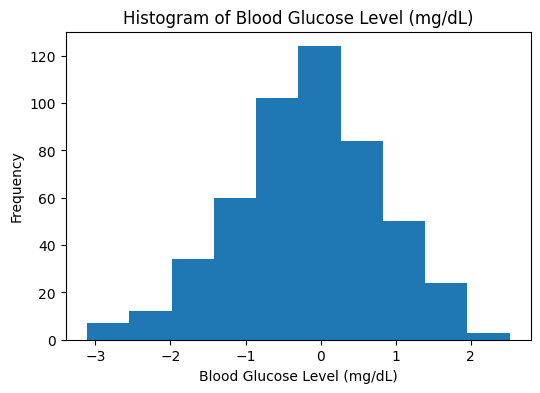

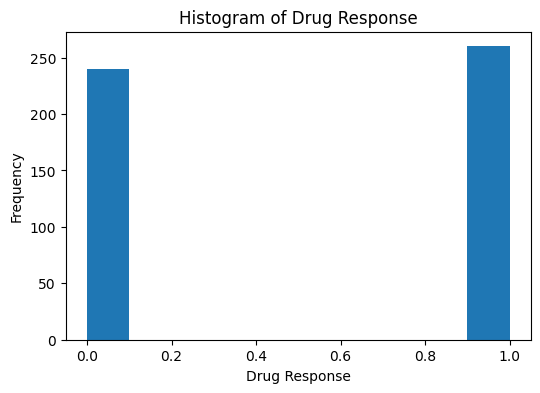

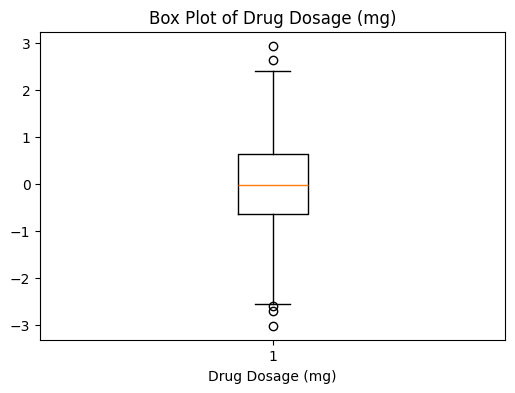

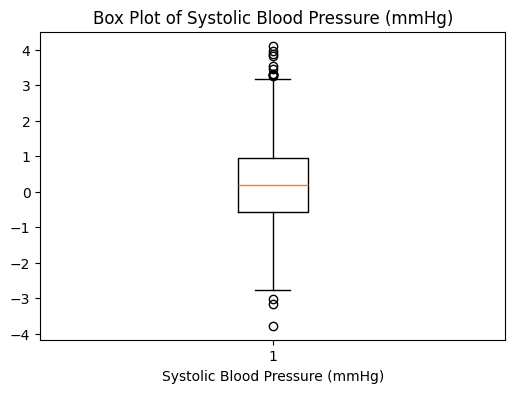

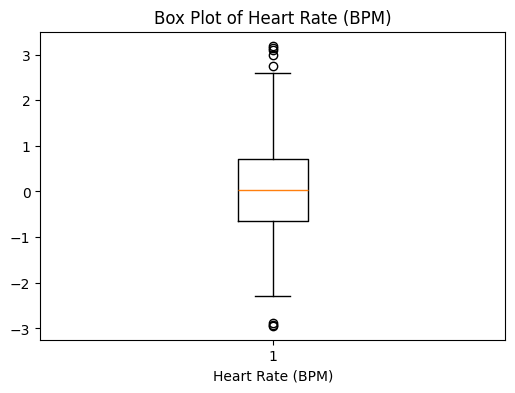

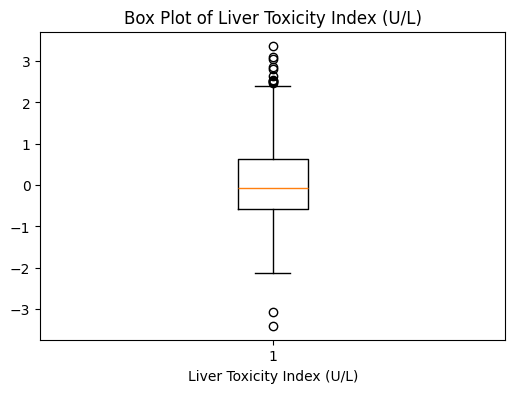

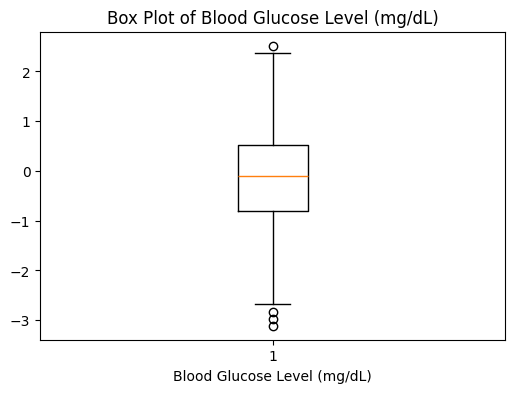

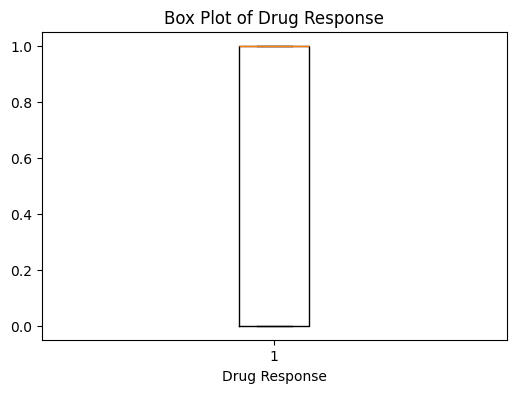

In [13]:
# Select numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Plot box plots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()


Correlation Matrix:
                                 Drug Dosage (mg)  \
Drug Dosage (mg)                        1.000000   
Systolic Blood Pressure (mmHg)          0.090618   
Heart Rate (BPM)                        0.040571   
Liver Toxicity Index (U/L)              0.128127   
Blood Glucose Level (mg/dL)             0.012434   
Drug Response                           0.043457   

                                Systolic Blood Pressure (mmHg)  \
Drug Dosage (mg)                                      0.090618   
Systolic Blood Pressure (mmHg)                        1.000000   
Heart Rate (BPM)                                     -0.039195   
Liver Toxicity Index (U/L)                            0.283672   
Blood Glucose Level (mg/dL)                           0.037228   
Drug Response                                         0.305226   

                                Heart Rate (BPM)  Liver Toxicity Index (U/L)  \
Drug Dosage (mg)                        0.040571                    0.1

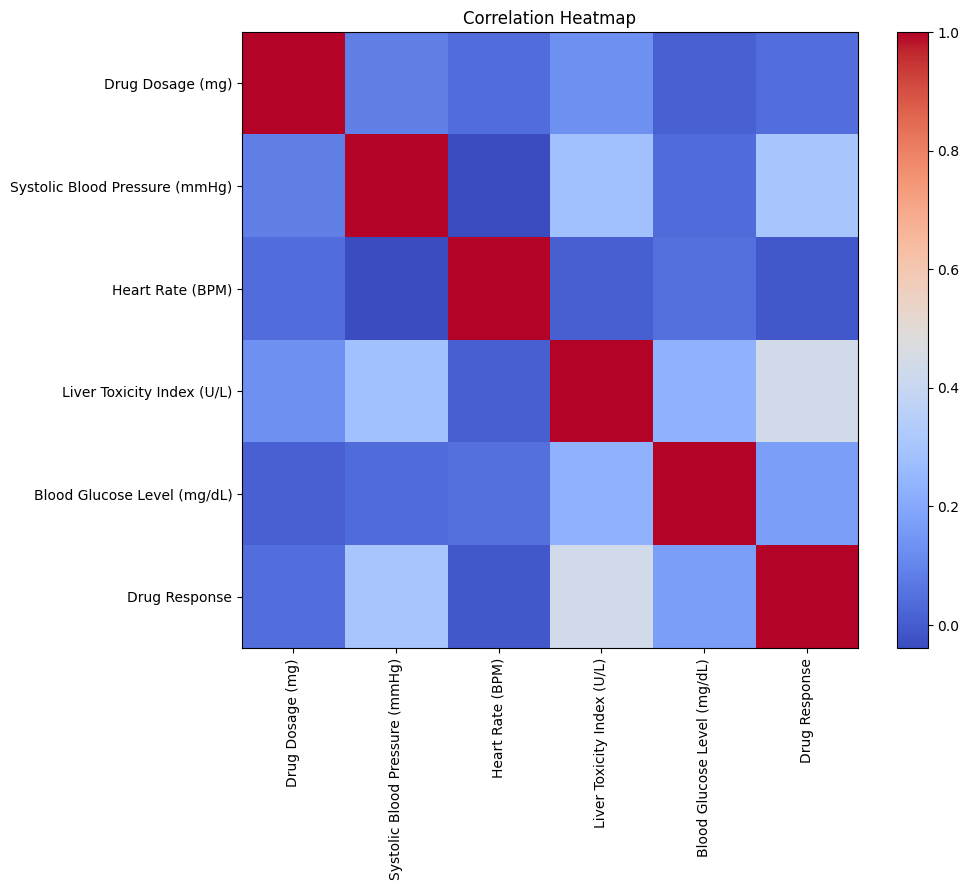

In [16]:
# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Display correlation table
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encode binary or ordered columns
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() <= 2:
        df[col] = le.fit_transform(df[col])

# One-Hot Encode for other nominal columns
df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2], drop_first=True)

df.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [22]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df.drop("Drug Response", axis=1)   # replace with the exact target column name
y = df["Drug Response"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes to confirm
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (400, 5)
Testing set shape: (100, 5)


<Figure size 1200x1000 with 0 Axes>

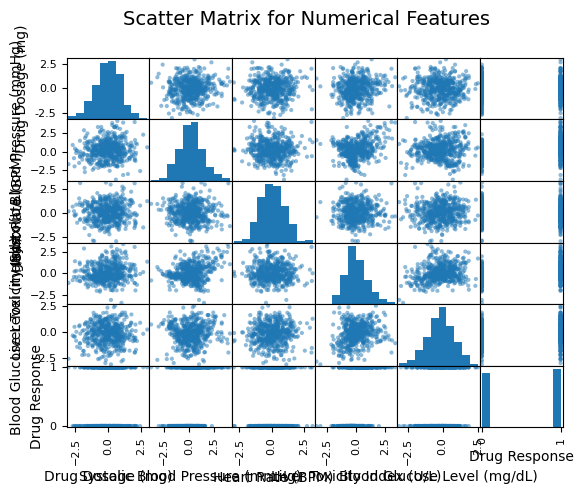

In [29]:
# Select numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Scatter matrix visualization
plt.figure(figsize=(12, 10))
pd.plotting.scatter_matrix(df[numeric_cols])
plt.suptitle("Scatter Matrix for Numerical Features", fontsize=14)
plt.show()


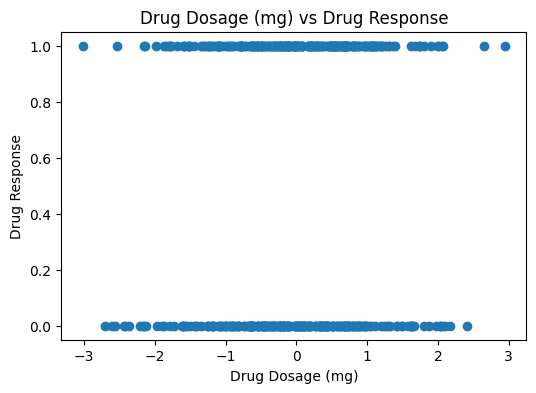

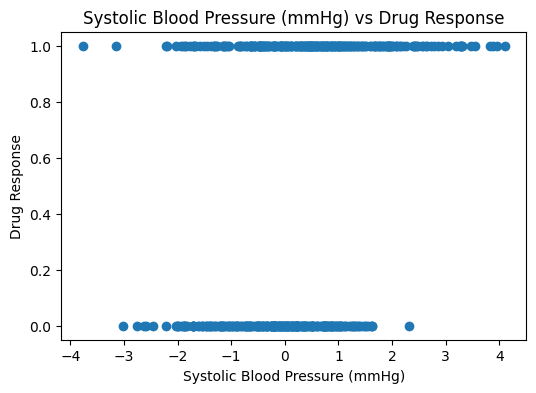

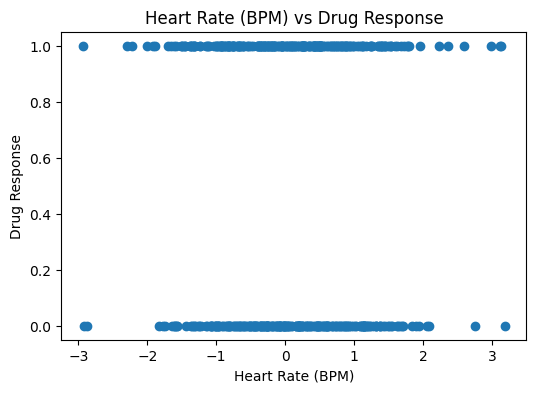

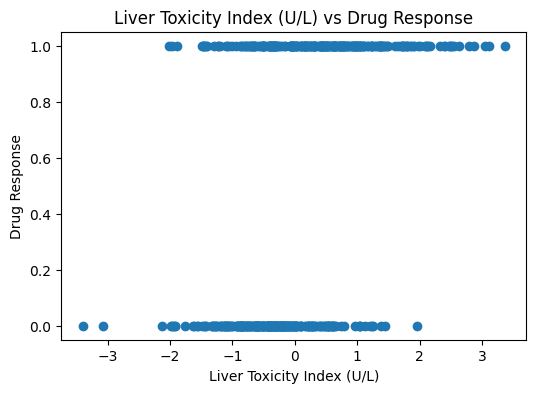

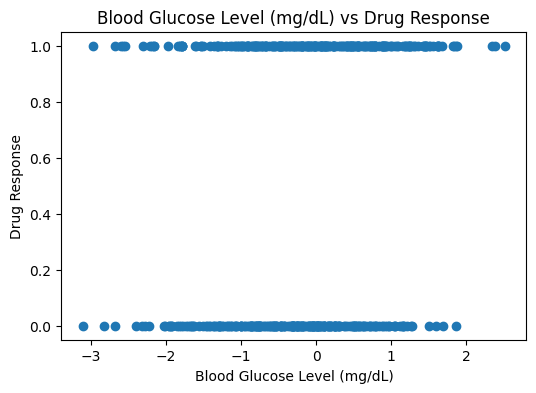

In [30]:
target = "Drug Response"

for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df[target])
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()


Class Distribution:
 Drug Response
1    260
0    240
Name: count, dtype: int64


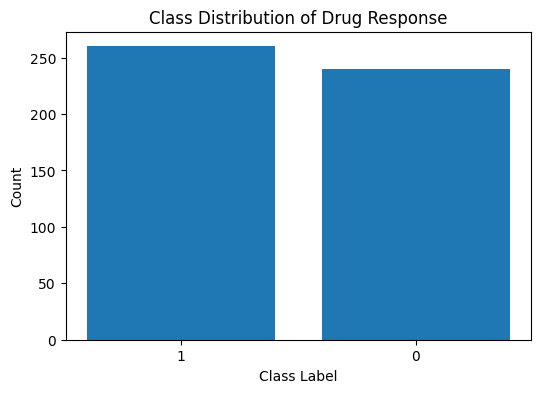

In [32]:
# Replace with actual target variable name if different
target_col = "Drug Response"

# Count class values
class_counts = df[target_col].value_counts()

# Display counts
print("Class Distribution:\n", class_counts)

# Visualization
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class Distribution of Drug Response")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [34]:
from sklearn.svm import SVC

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ----------------------------
# 1. Separate features & target
# ----------------------------
X = df.drop("Drug Response", axis=1)   # update if target name differs
y = df["Drug Response"]

# ----------------------------
# 2. Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3. Train SVM Classifier
# ----------------------------
svm_model = SVC(kernel='linear')  # kernel can be 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# ----------------------------
# 4. Make Predictions
# ----------------------------
y_pred = svm_model.predict(X_test)

# ----------------------------
# 5. Evaluate Model
# ----------------------------
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Accuracy: 0.72

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100


🔹 Confusion Matrix:
 [[37 11]
 [17 35]]


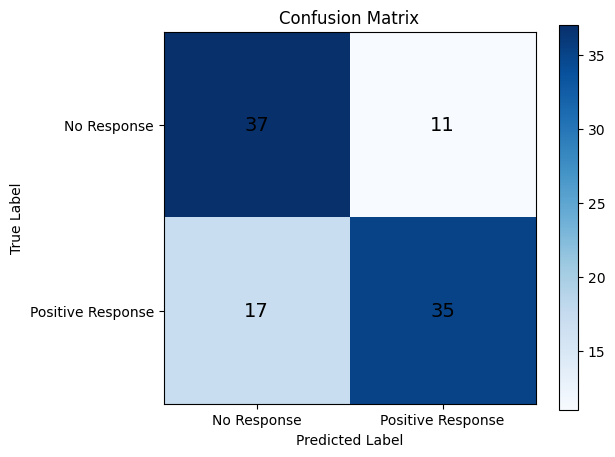

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Visualization
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Tick labels
plt.xticks([0,1], ["No Response", "Positive Response"])
plt.yticks([0,1], ["No Response", "Positive Response"])

# Add numeric labels
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14)

plt.colorbar()
plt.show()

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Linear Kernel": SVC(kernel='linear'),
    "RBF Kernel": SVC(kernel='rbf'),
    "Polynomial Kernel": SVC(kernel='poly', degree=3),
    "RBF with C=10": SVC(kernel='rbf', C=10),
    "RBF with gamma=0.1": SVC(kernel='rbf', gamma=0.1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

results


{'Linear Kernel': 0.72,
 'RBF Kernel': 0.78,
 'Polynomial Kernel': 0.72,
 'RBF with C=10': 0.73,
 'RBF with gamma=0.1': 0.77}

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # only used when kernel='poly'
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scal

In [51]:
best_svm = grid.best_estimator_
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))


Final Test Accuracy: 0.72


In [ ]:

results = {}

# Train each model and evaluate
for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print comparison results
print("Performance Comparison Across Kernels:")
for k, v in results.items():
    print(f"{k}: {round(v * 100, 2)}% accuracy")


In [ ]:
"""Strengths:Handles High-Dimensional data
- Kernels help capture non linear patters
- Good for imbalanced or Noisy data
- Margin maximization Improves generalization(Avoid ovetfitting)

Weakness:Sensitivity to Feature scaling
- Kernel selection and tuning can be complex
- Harder to interpret compared to logistic regression
- Computational expensive on large Datasets"""

In [ ]:
"""Support Vector Machines (SVM) are widely used in real-world classification scenarios—especially when accuracy, reliability, and decision boundaries matter more than model interpretability or deployment speed. Based on your analysis and typical outcomes from drug-response prediction datasets, here are the practical implications of using SVM in real-world applications:
- Effective in small to medium sized datasets
- Handles Complex, nonlinear decision Boundaries
- Strong Generalization Capability
- Requires Careful Preprocessing and scaling
- 